In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

og_df = pd.read_csv("hf://datasets/nprak26/remote-worker-productivity/remote_work_productivity.csv")

X_data = og_df[['WFH_Days_Per_Week']]
y_data = og_df['Productivity_Score']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


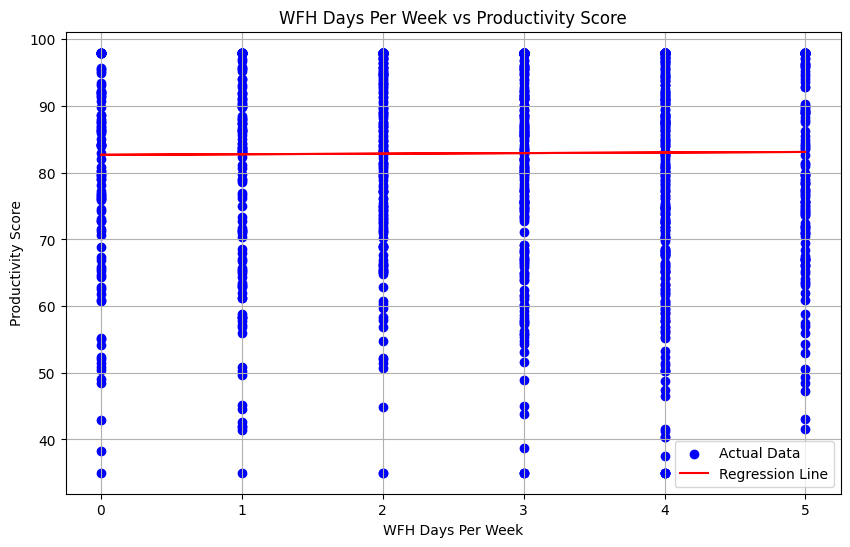

Coefficient: 0.09
Intercept: 82.69
RMSE on Training Data: 15.44
MAE on Training Data: 12.81
R^2 on Training Data: 0.00
RMSE on Test Data: 14.33
MAE on Test Data: 11.79
R^2 on Test Data: -0.00


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train_reshaped = X_train.values.reshape(-1, 1)
y_train_values = y_train.values

model = LinearRegression()

model.fit(X_train_reshaped, y_train_values)

y_pred_train = model.predict(X_train_reshaped)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_reshaped, y_train_values, color='blue', label='Actual Data')
plt.plot(X_train_reshaped, y_pred_train, color='red', label='Regression Line')
plt.title('WFH Days Per Week vs Productivity Score')
plt.xlabel('WFH Days Per Week')
plt.ylabel('Productivity Score')
plt.legend()
plt.grid(True)
plt.show()

print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

mse_train = mean_squared_error(y_train_values, y_pred_train)
rmse_train = np.sqrt(mse_train)
print(f"RMSE on Training Data: {rmse_train:.2f}")

mae_train = mean_absolute_error(y_train_values, y_pred_train)
print(f"MAE on Training Data: {mae_train:.2f}")

r2_train = r2_score(y_train_values, y_pred_train)
print(f"R^2 on Training Data: {r2_train:.2f}")

X_test_reshaped = X_test.values.reshape(-1, 1)
y_test_values = y_test.values

y_pred_test = model.predict(X_test_reshaped)

mse_test = mean_squared_error(y_test_values, y_pred_test)
rmse_test = np.sqrt(mse_test)
print(f"RMSE on Test Data: {rmse_test:.2f}")

mae_test = mean_absolute_error(y_test_values, y_pred_test)
print(f"MAE on Test Data: {mae_test:.2f}")

r2_test = r2_score(y_test_values, y_pred_test)
print(f"R^2 on Test Data: {r2_test:.2f}")